# This is a the Test Simulation for TESS Asteroseismology Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
import astropy.units as u
from targetlib import testfield_gal,testfield_fk5,testfield_ecl,h2exp
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

In [2]:
rgb_tab = Table.read('workspace/target_files/RGB/giant_targets.txt',format='ascii')
rgb_tab

ticname,tmname,ra,dec,eclong,eclat,tessmag,tessmag_e,hmag,hmag_e,teff,logg
str17,str17,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
08010730-4749541,08010730-4749541,120.280442,-47.831711,144.995049,-65.590633,12.873,0.036,11.345,0.022,4425.0,nan
08011034-4716244,08011034-4716244,120.293096,-47.273472,144.369435,-65.097079,9.956,0.036,8.342,0.031,4315.0,nan
08013591-4726456,08013591-4726456,120.399649,-47.446003,144.716714,-65.214069,13.402,0.034,11.717,0.025,4187.0,nan
08020422-4736540,08020422-4736540,120.517599,-47.615009,145.078213,-65.323764,12.921,0.033,11.265,0.023,4198.0,nan
08022522-4735199,08022522-4735199,120.605094,-47.588886,145.171497,-65.272352,13.65,0.066,12.009,0.022,4177.0,nan
08015487-4718531,08015487-4718531,120.478643,-47.314758,144.678695,-65.073246,13.264,0.032,11.538,0.027,4073.0,nan
19271012+4447043,19271012+4447043,291.792167,44.78455,309.08116,65.293978,14.115,0.031,12.5,0.017,4295.0,nan
19272865+4459247,19272865+4459247,291.869383,44.990219,309.379224,65.46682,14.178,0.047,12.774,0.026,4700.0,nan
19273817+4453066,19273817+4453066,291.909073,44.885181,309.352338,65.358666,12.227,0.035,10.877,0.017,4664.0,nan


# Select Stars in these fields
### Southern TESS CVZ
Coordinates: ecliptic latitude < -66 
### Northern BHM Medium Cadence/Legacy RV area
155 < Galactic Longitude < 260

38 < Galactic Latitude < 80

In [3]:
south_tess_tab = rgb_tab[(rgb_tab['eclat'] < -66)]
planet_coord = SkyCoord(rgb_tab['ra'],rgb_tab['dec'],unit=(u.deg,u.deg),frame="fk5")
planet_coord_gal = planet_coord.transform_to(Galactic())
mask = (planet_coord_gal.l > 155*u.deg) & (planet_coord_gal.l < 260*u.deg) & (planet_coord_gal.b > 38*u.deg) & (
        planet_coord_gal.b < 260*u.deg)
bhm_tess_tab = rgb_tab[mask]
rgb_tab = vstack([south_tess_tab,bhm_tess_tab])

/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


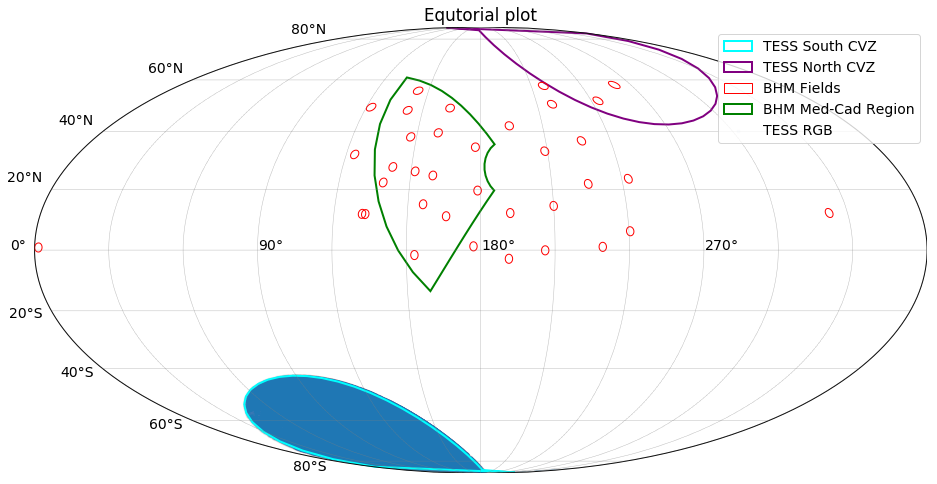

In [4]:
plt.rcParams.update({'font.size': 14})

(fig,bmap) = testfield_fk5()
#Plot Planet Targets
xplan,yplan = bmap(rgb_tab['ra'],rgb_tab['dec'])
bmap.scatter(xplan,yplan,marker='.',label='TESS RGB',alpha=.01)
plt.title("Equtorial plot")
plt.legend()
plt.show()

## Create Target Table

In [5]:
target_tab = Table()

## Determine Cadence type

In [6]:
(bins, edges) = np.histogram(rgb_tab['hmag'],bins=100,range=(0,10))
mag_center = (edges[1:] - edges[0:-1])/2 + edges[0:-1]
numexp = h2exp(mag_center,sn=80,exptime=15)
for i in np.arange(len(mag_center)):
    if i > 80:
        print("H Mag: {:.2f} Num Exp: {} Num Stars: {} Total Stars: {}".format(mag_center[i],numexp[i]
                                                                           ,bins[i],np.sum(bins[:i+1])))

H Mag: 8.15 Num Exp: 1.0 Num Stars: 1558 Total Stars: 18241
H Mag: 8.25 Num Exp: 1.0 Num Stars: 1663 Total Stars: 19904
H Mag: 8.35 Num Exp: 1.0 Num Stars: 1724 Total Stars: 21628
H Mag: 8.45 Num Exp: 1.0 Num Stars: 1842 Total Stars: 23470
H Mag: 8.55 Num Exp: 1.0 Num Stars: 2062 Total Stars: 25532
H Mag: 8.65 Num Exp: 1.0 Num Stars: 2234 Total Stars: 27766
H Mag: 8.75 Num Exp: 1.0 Num Stars: 2334 Total Stars: 30100
H Mag: 8.85 Num Exp: 1.0 Num Stars: 2574 Total Stars: 32674
H Mag: 8.95 Num Exp: 1.0 Num Stars: 2666 Total Stars: 35340
H Mag: 9.05 Num Exp: 1.0 Num Stars: 3004 Total Stars: 38344
H Mag: 9.15 Num Exp: 1.0 Num Stars: 3198 Total Stars: 41542
H Mag: 9.25 Num Exp: 1.0 Num Stars: 3301 Total Stars: 44843
H Mag: 9.35 Num Exp: 1.0 Num Stars: 3595 Total Stars: 48438
H Mag: 9.45 Num Exp: 1.0 Num Stars: 3822 Total Stars: 52260
H Mag: 9.55 Num Exp: 1.0 Num Stars: 4165 Total Stars: 56425
H Mag: 9.65 Num Exp: 1.0 Num Stars: 4277 Total Stars: 60702
H Mag: 9.75 Num Exp: 1.0 Num Stars: 4407

## I am going to do a cut at H<8.6 for the moment

In [7]:
sm_rgb_tab = rgb_tab[(rgb_tab['hmag'] < 8.6)]
sm_rgb_tab

ticname,tmname,ra,dec,eclong,eclat,tessmag,tessmag_e,hmag,hmag_e,teff,logg
str17,str17,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
07311386-4617340,07311386-4617340,112.807754,-46.292805,132.060877,-66.432911,9.682,0.042,7.43,0.057,3649.0,nan
08332479-5752515,08332479-5752515,128.353314,-57.880974,172.123332,-70.545731,7.25,0.029,5.54,0.04,4147.0,nan
08330849-5700560,08330849-5700560,128.285409,-57.015564,170.17705,-69.981446,10.031,0.029,7.86,0.036,3676.0,nan
08333511-5905248,08333511-5905248,128.396295,-59.090244,174.968679,-71.319911,9.406,0.029,7.782,0.038,4178.0,nan
08342330-5552528,08342330-5552528,128.597124,-55.881355,168.232571,-69.0576,9.523,0.038,8.018,0.044,4390.0,nan
05083220-6832493,05083220-6832493,77.134202,-68.547028,332.118673,-84.713666,9.904,0.038,8.42,0.044,4500.0,nan
08410107-5953362,08410107-5953362,130.254475,-59.893402,178.742333,-71.082251,8.495,0.041,6.364,0.034,3734.0,nan
08481271-5524576,08481271-5524576,132.05299,-55.416004,171.14945,-67.369961,9.28,0.04,7.073,0.031,3631.0,nan
07220899-4730125,07220899-4730125,110.537491,-47.50349,129.537041,-68.142723,10.268,0.034,8.234,0.051,3835.0,nan


8.599
25534.0


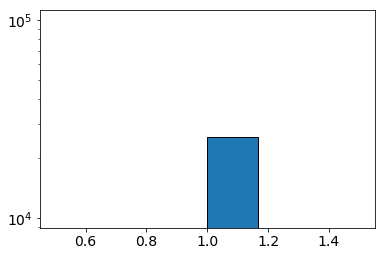

In [8]:
numexp = h2exp(sm_rgb_tab['hmag'],sn=80)
print(np.max(sm_rgb_tab['hmag']))
print(np.sum(numexp))
plt.hist(numexp,bins=6,log=True,edgecolor='black')
plt.show()

In [9]:
cadence_list = ["rgb_exp{:.0f}".format(num) for num in numexp]
print(cadence_list[0:40])

['rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1', 'rgb_exp1']


In [10]:
target_tab['ra'] = sm_rgb_tab['ra']
target_tab['dec'] = sm_rgb_tab['dec']
target_tab['cadence'] = cadence_list
target_tab['type'] = np.repeat('TESS_RGB',len(sm_rgb_tab))
target_tab['priority'] = np.repeat(np.array(85,dtype='int32'),len(sm_rgb_tab))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(sm_rgb_tab))

In [11]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str8,str8,int32,float32
112.807754,-46.292805,rgb_exp1,TESS_RGB,85,1.0
128.353314,-57.880974,rgb_exp1,TESS_RGB,85,1.0
128.285409,-57.015564,rgb_exp1,TESS_RGB,85,1.0
128.396295,-59.090244,rgb_exp1,TESS_RGB,85,1.0
128.597124,-55.881355,rgb_exp1,TESS_RGB,85,1.0
77.134202,-68.547028,rgb_exp1,TESS_RGB,85,1.0
130.254475,-59.893402,rgb_exp1,TESS_RGB,85,1.0
132.05299,-55.416004,rgb_exp1,TESS_RGB,85,1.0
110.537491,-47.50349,rgb_exp1,TESS_RGB,85,1.0


In [12]:
target_tab.write('fps_TESS_RGB_target.fits',overwrite=True)

## Create Cadence Table
The cadence I would like to use is using minimums
```
[0 300]
```

In [13]:
cadence_tab = Table()

In [14]:
cadence_tab['cadence'] = np.array(['rgb_exp1'])
cadence_tab['nepochs'] = np.array([2],dtype='int32')
delta = np.array([[0,300]],dtype='float32')
print(delta)
cadence_tab['delta'] = delta

[[   0.  300.]]


In [15]:
cadence_tab

cadence,nepochs,delta [2]
str8,int32,float32
rgb_exp1,2,0.0 .. 300.0


In [16]:
softness = np.array([[1,280]],dtype='float32')
print(softness)
cadence_tab['softness'] = softness

[[   1.  280.]]


In [17]:
lunation = np.array([[1,1]],dtype='float32')
print(lunation)
cadence_tab['lunation'] = lunation

[[ 1.  1.]]


In [18]:
instrument = np.array([['apogee','apogee']],dtype='str')
print(instrument)
cadence_tab['instrument'] = instrument

[['apogee' 'apogee']]


In [19]:
cadence_tab

cadence,nepochs,delta [2],softness [2],lunation [2],instrument [2]
str8,int32,float32,float32,float32,str6
rgb_exp1,2,0.0 .. 300.0,1.0 .. 280.0,1.0 .. 1.0,apogee .. apogee


In [20]:
cadence_tab.write('fps_TESS_RGB_cadence.fits',overwrite=True)

In [21]:
test =  Table.read('fps_TESS_RGB_cadence.fits')
test

cadence,nepochs,delta [2],softness [2],lunation [2],instrument [2]
bytes8,int32,float32,float32,float32,bytes24
rgb_exp1,2,0.0 .. 300.0,1.0 .. 280.0,1.0 .. 1.0,apogee .. apogee
